# 1.2.1 Linear and Non-Linear Relationship with Regression

Regression is a statistical method used to understand and predict the relationship between variables. It involves:

1. **Dependent Variable**: The outcome you're trying to predict (e.g., house price).
2. **Independent Variables**: The factors that might influence the outcome (e.g., house size, location).

### Types of Regression:

- **Linear Regression**: Predicts the outcome using a straight-line relationship.

    {y= mx + b or y= a0 + a1*x }
  
- **Multiple Regression**: Uses multiple factors to predict the outcome.

   {y= a0 + a1*x1 + a2*x2} (Multilinear - when degree of equation remains 1)
  
- **Polynomial Regression**: Models the relationship as a polynomial (curved line) to capture more complex patterns.

   { for degree = n ,     y= a0 + a1*x + a2*x^2 +...+ an*a^n}
  
- **Logistic Regression**: Predicts categorical outcomes (e.g., yes/no).

    { p(y=1) = 1/ 1+e ^-(a0 + a1*x)   or   p(y=1) = sigmoid(a0+ a1*x) }
  

### Example:

For predicting house prices:

    Price = 50000 + 200 * (Size)                      {y= a0 + a1*x}

This means the base price is 50,000, and each additional square meter adds 200 to the price.

For polynomial regression, the relationship might look like:

    Price = 50000 + 200 *(Size) - 0.5* (Size)^2       {y= a0 + a1*x + a2*x^2}
    
This equation can model more complex, non-linear relationships.

### Uses:

- **Prediction**: Estimate future outcomes.
- **Understanding Relationships**: Determine how variables influence the outcome.
- **Identifying Trends**: Find patterns in data.

Regression helps in making informed decisions and accurate predictions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Generate some synthetic data for regression analysis
np.random.seed(0)
X = np.random.rand(100, 1) * 100  # Independent variable
y = 2 * X + 3*X**2 + 4* X**3 + np.random.randn(100, 1) * 2  # Dependent variable with some noise

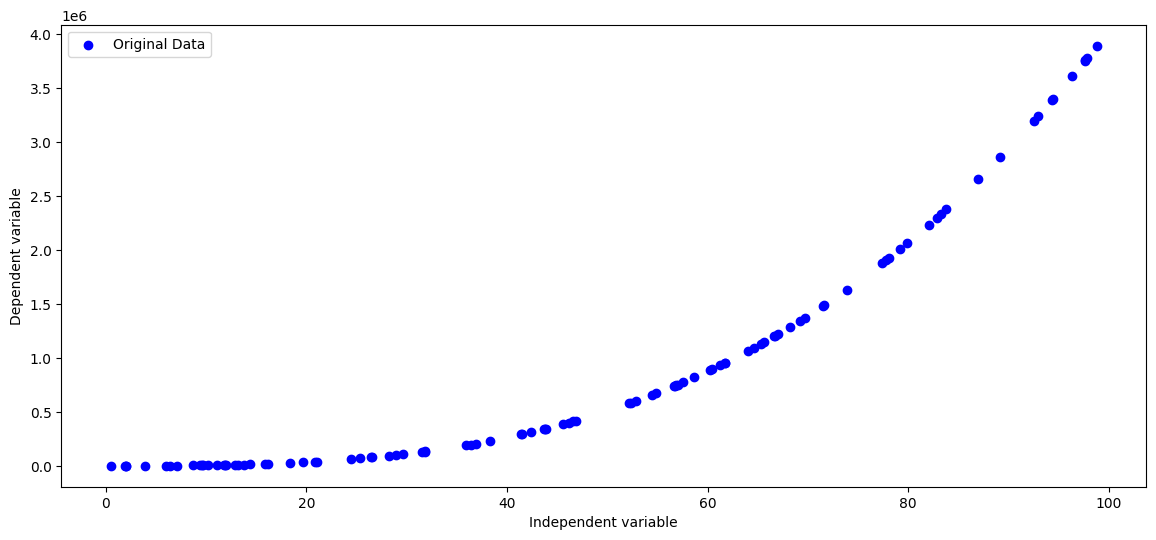

In [3]:
plt.figure(figsize=(14, 6))
# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Original Data')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

Since we can easily visualise the data in <B>2 dimensions</B>, we can verify by the plot that if we were to plot a straight line through this data, it wouldn't make much sense, in ML we call that <b>underfitting</b>, in data with large <b>no. of rows</b>, called <b>dimensions</b>, we cannot visualise the data this easily, therefore we have to try different approaches and different models.

In [4]:
# Simple Linear Regression
lin_reg = LinearRegression() #making an object of the class
lin_reg.fit(X, y)  #Fitting the model to the data
y_pred_linear = lin_reg.predict(X)  #using the model, making predictions

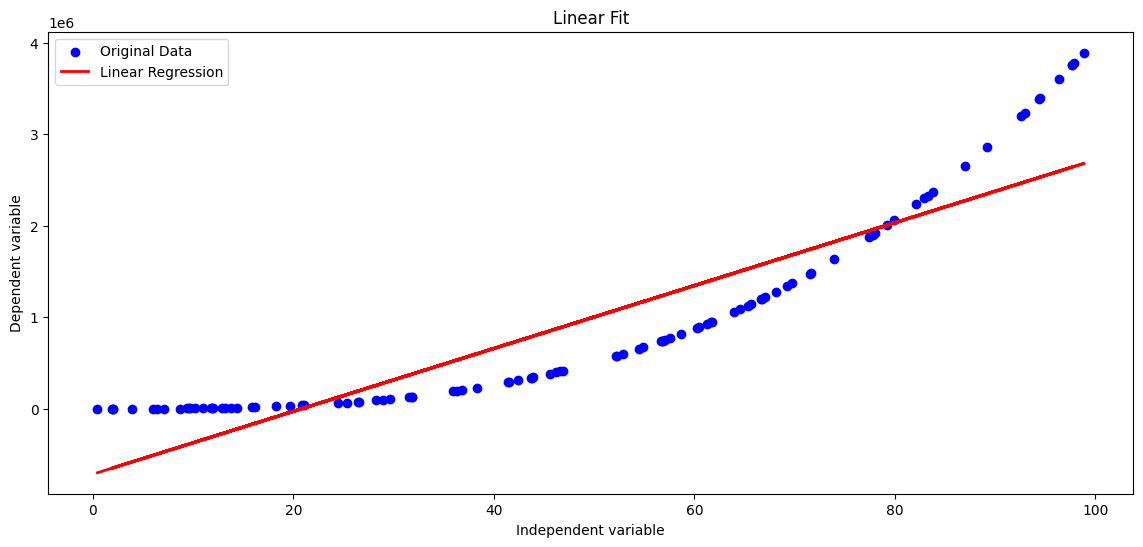

In [5]:
plt.figure(figsize=(14, 6))
# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Original Data')
# Plot for Simple Linear Regression
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Linear Regression')

# Titles and labels
plt.title('Linear Fit')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

In [6]:
# Polynomial Regression (degree 3)
# the following two steps create what we call a vandermonde matrix, x_poly
#and using that matrix, we can use the linear regression model for polynomial regression

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

In [7]:
#example of creating a vandermonde matrix 
x1=np.array([2,3,4,5,6,7]).reshape(-1,1)
poly_features = PolynomialFeatures(degree=3)
van = poly_features.fit_transform(x1)
print(van)

[[  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]]


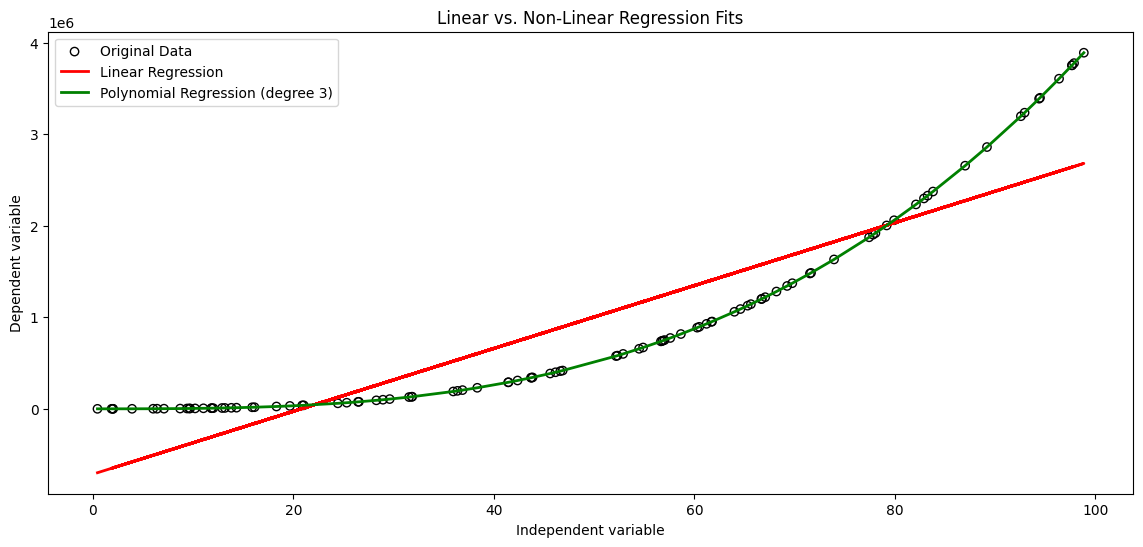

In [8]:
plt.figure(figsize=(14, 6))
# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Original Data',facecolor='none',edgecolor='k')

# Plot for Simple Linear Regression
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Linear Regression')

# Plot for Polynomial Regression
# This extra step sorts the data so that the plot is correct
X_sorted, y_pred_poly_sorted = zip(*sorted(zip(X, y_pred_poly)))

plt.plot(X_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Polynomial Regression (degree 3)')

# Titles and labels
plt.title('Linear vs. Non-Linear Regression Fits')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()


plt.show()

## Conclusion

In the domain of regression analysis, we explored two fundamental techniques for modeling relationships between variables: **Simple Linear Regression** and **Polynomial Regression**.

### Simple Linear Regression
Simple Linear Regression establishes a linear relationship between a dependent variable and one independent variable. It assumes a straight-line relationship between the variables. We employed the `LinearRegression` class from `sklearn` to fit this model.

### Polynomial Regression
When the relationship between variables exhibits more complexity than a straight line, Polynomial Regression comes into play. This technique extends the simple linear model by incorporating polynomial terms of the independent variable(s). In our demonstration, we utilized `PolynomialFeatures` to generate polynomial features and then applied linear regression. We selected a polynomial of degree 2 for our example, but the degree can be adjusted depending on the complexity of the relationship.

By comparing the outcomes of both linear and polynomial regression, we glean insights into the applicability of these models for capturing the underlying patterns in the data. When visualizing the fits, it's essential to recognize that while linear regression assumes a linear relationship, polynomial regression can accommodate more intricate, non-linear patterns.

In summary, simple linear regression is suitable when the relationship between variables appears linear, whereas polynomial regression offers a more adaptable approach for modeling non-linear relationships. The choice between these methods hinges on the characteristics of the data and the underlying assumptions regarding the relationship between variables.


[ 1 16  4  9]


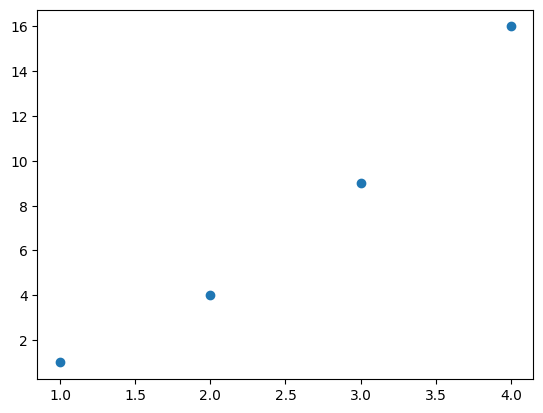

In [9]:
# Example to explain the importance of sorting before plotting
# let the simple equation be y= x^2
X=np.array([1,4,2,3])
y=X**2
print(y)
plt.scatter(X,y)
#sorting does not affect a scatter plot

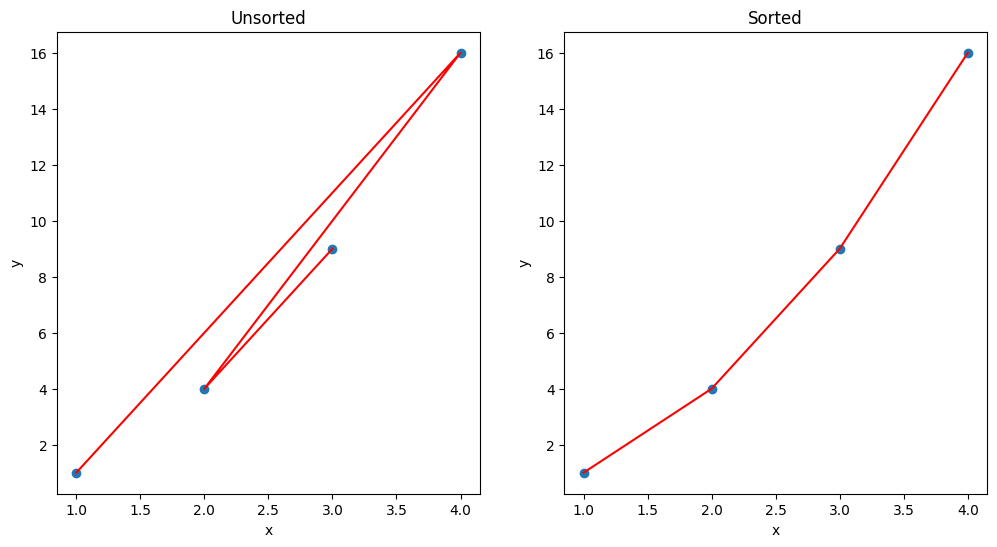

In [10]:
X=np.array([1,4,2,3])
y=X**2
# Creating the first subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.scatter(X,y)
plt.plot(X, y, color='r')
plt.title('Unsorted')
plt.xlabel('x')
plt.ylabel('y')


X,y=zip(*sorted(zip(X,y)))
# Creating the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.scatter(X,y)
plt.plot(X, y, color='r')
plt.title('Sorted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()